# Linear Regression

In this lab, we will explore the fundamental underpinnings of linear algebra we have hinted at for the last several classes: linear combinations of vectors. This lab has two parts spread over two weeks. 

The fundamental questions we ask is
1. What is the space of linear combinations of $n$ arbitrary vectors $v_1,\ldots, v_n$?
2. The notion of linear independence.
3. Can a vector $u$ be written as a linear combination of $v_1,\ldots,v_n$?
4. If not, what is the projection of $u$ onto the space of linear combinations of $v_1,\ldots, v_n$.



In [2]:
import numpy as np
import numpy.random as npr

# For plotting

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


[[0]
 [0]]


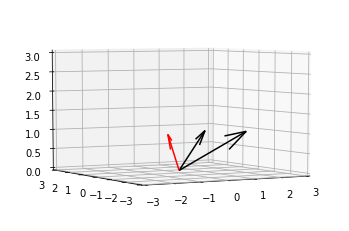

In [3]:
 # We now look at two vectors (2,-1,1) and (1,0,1)

u = np.array([[2, -1, 1],[1,0,1]])

# Let us plot these vectors:

# zip below reads u row-wise and assigns in turn to X, Y, Z. So X contains
# 1st coordinate of the two vectors, Y contains the 2nd coordinate
# and Z contains the 3rd coordinate. print(X) below 
# to see what has happened with the zip command. 
X, Y, Z = zip(*u)

print(u @ np.array([[-1],[-1],[1]]))

origin = [[0],[0],[0]]

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.quiver(*origin, X, Y, Z, color=['black','black'])
plt.quiver(*origin, -1, -1, 1,color=['red'])

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([0, 3])
ax.view_init(5,240)


We will plot the set of all linear combinations of the two vectors above. We should be getting a plane
of course, but let us do it and see for ourselves. If ${\bf u}_1$ is the vector in the first row above, and ${\bf u}_2$
the vector in the second row, we will plot all vectors in the set
$$ \bigl\{  w_1 {\bf u}_1 + w_2 {\bf u}_2 : -2 \le w_1 \le 2 \textrm{ and } -2 \le w_2 \le 2 \bigr\}.$$
You can of course plot more points if you wish, but these should give us a pretty good idea.

A couple of points below. If we think of ${\bf u}_1$ and ${\bf u}_2$ as row vectors, then
$$ \begin{bmatrix} w_1 & w_2 \end{bmatrix} \begin{bmatrix} {\bf u}_1 \\ {\bf u}_2 \end{bmatrix} = w_1 {\bf u}_1 + w_2 {\bf u}_2. $$
Our implementation will exploit this.

We will plot all the vectors of the set above as a surface. python requires that we arrange each of the x, y and z coordinates
of these points as a matrix, and the use of meshgrid and the particular array sizes below reflect that constraint.

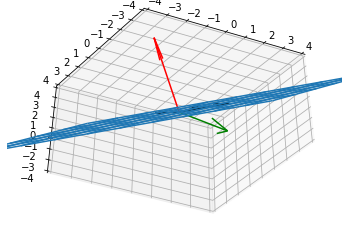

In [4]:
# the following creates a grid of 100*100 
# values in the rectangle with corners (-3,-3)
# (-3,3), (3,3) and (3,-3). The x co-ordinates
# of all the points are assigned to w1 (a 100x100 matrix), the
# y coordinates to w2 (another 100x100 matrix).

x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)

w1,w2 = np.meshgrid(x,y)

# we are eseentially looking at the linear combination
# of the rows of u for all coefficients -3 \le w1 \le 3
# (obtained by meshgrid above) and -3 \le w2 \le 3.

W = np.stack((w1,w2),axis=2)
ptsonplane = ( W @ u )

# ptsonplane is a 100x100 stack of 3 co-ordinate vectors. 
# The first, second and third coordinates are the x-, y-
# and z- coordinates respectively of the 100x100 points.

Xp = ptsonplane[:,:,0]
Yp = ptsonplane[:,:,1]
Zp = ptsonplane[:,:,2]

origin = [0],[0],[0]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(Xp, Yp, Zp,rstride=20,cstride=10)
plt.quiver(*origin, X, Y, Z, color=['black','black'])

# We also plot the vector perpendicular to the plane: (1,1,-1) (scaled by -3 for better visualization)
# Note that this plane can be represented by (1,1,-1) dot w = 0.

plt.quiver(*origin, -3, -3, 3, color=['red'])

# Note that (1,1,-1) dot (-2, 5, 3) =0, so (-2,5,3) must lie on the plane as well. Sure enough it does.

plt.quiver(*origin, -2/4, 5/4, 3/4, color=['black'])
plt.quiver(*origin, 5,4,4, color=['green'])
ax.set_ylim([-4,4])
ax.set_xlim([-4,4])
ax.set_zlim([-4,4])

# Note from the view at this angle, the three black vectors are on the plane, the red and green are outside the plane.
ax.view_init(-45,240)
plt.draw()

Now we have the three vectors (2,-1,1), (1,0,1) and (-2, 5,3), all of which are on the plane (the black vectors).
We want to see if (5,4,4) (the green vector) can be written as a linear combination of these vectors. Equivalently,
we ask if
$$ w_1 \begin{bmatrix} 2\\-1\\1 \end{bmatrix}+ w_2 \begin{bmatrix} 1\\0\\1\end{bmatrix} + w_3 \begin{bmatrix} -2 \\5\\3\end{bmatrix}$$
can ever equal (5,4,4) for some values of $w_1,w_2,w_3$. Of course, the vector (5,4,4) dot (1, 1, -1) != 0, so (5,4,4) 
does not lie on the plane above. Any linear combination of the vectors in the equation above can only lie on the blue plane, and never ever leave it. So we conclude that no matter what values of $w_1,w_2, w_3$ we choose, we will not be able to represent (5,4,4) as the linear combination in the equation above.

Completely equivalent is asking if the following set of equations has a solution:

\begin{align*}
2 w_1 - 1 w_2 - 2 w_3 &= 5 \\
-1 w_1 + 0 w_2 + 5 w_3 &= 4 \\
 1 w_1 + 1 w_2 + 3 w_3 &= 4
\end{align*}

The answer again is no. 
 
If the right side of the last equation were changed to 9, we would have solutions---in fact, infinitely many of them. Explain why in a separate cell below. 



In the above case, we had the magic vector (1,1,-1) that was perpendicular to both (2,-1,1) and (1,0,1). What if we did not? If we want to see if a third vector belongs to the same plane as the first two, how would we do it? The answer is simple---we see if the third vector is a linear combination of the first two or in other words, we solve a set of equations. Let us see how we would do this below. Consider vectors (1, 2, 3) and (-1, 4, 2). Draw the plane corresponding to all linear combinations of the above vector by reusing the code from above.

Let us now check if the vector (2,10,2) belongs to the plane above. To do so, we see if there are numbers $w_1$ and $w_2$ such that 
$$ w_1 \begin{bmatrix} 1\\2\\3\end{bmatrix} +w_2 \begin{bmatrix} -1\\4\\2\end{bmatrix} = \begin{bmatrix} 2\\10\\2\end{bmatrix}$$

We know how to solve the equations above---by elimination. First we kill the coefficients of $w_1$ in the second and third equations. Find the matrices that do the elimination---to get you started, in the cell below I have eliminated the coefficient of $w_1$ in the second equation above. 

In [11]:
A = np.array([[1,2,3],[-1,4,2]]).T
b = np.array([2,10,2]).reshape(3,1)

# Pivot 1 = 1
# To eliminate the coefficient of w_1 in equation 2:
# subtract 2 times first equation from the second. Recall that this is 
# done by multiplying on the left by the following matrix---the 
# first row says we take 1 (1,-1)+0 (2.4) + 0(3,2) as the first row
# of the product, which is (1,-1). The second row asks us to take
# -2(1,-1)+1(2,4)+0(3.2) as the second row of the product. and so on
# as we discussed in class.

E1 = np.array([[1,0,0],[-2,1,0],[0,0,1]])

# We now have the new set of equations: A1 w = b1 where w is the column vector with w_1 and w_2,
# and A1, b1 given by the equations:

A1 = E1 @ A
b1 = E1 @ b

# verify that the coefficient of w_1 in the second equation is 0:
print(A1,'\n',b1)

# Similarly write E2 that will kill the coefficient of w_1 in equation 3 below, and write out
# the new set of equations resulting from the elimination.

[[ 1 -1]
 [ 0  6]
 [ 3  2]] 
 [[2]
 [6]
 [2]]


Then you have to kill the coefficient of $w_2$ in the third equation. At that point, you will see if the resultant third equation. If that is consistent (meaning you get 0 =0 or something like that), you are good to go and you can find the solution by backsubstitution. If not, you have no solution and (2,2,2) does not lie in the plane. Continue in the cell below and find out if (2,10,2) lies in the plane.

In [12]:
E2 = np.array([[1,0,0],[0,1,0],[-3,0,1]])
A2 = E2 @ A1
b2 = E2 @ b1

E3 = np.array([[1,0,0],[0,1,0],[0,-5,6]])
A3 = E3 @ A2
b3 = E3 @ b2

print('A2=',A2, '\n b2=', b2)
print('\n A3=', A3, '\n b3 =', b3)

A2= [[ 1 -1]
 [ 0  6]
 [ 0  5]] 
 b2= [[ 2]
 [ 6]
 [-4]]

 A3= [[ 1 -1]
 [ 0  6]
 [ 0  0]] 
 b3 = [[  2]
 [  6]
 [-54]]


If (3,6,2) does not belong to the plane formed by (1,2,3) and (-1,4,2), how can you change the last entry of the target (2,10,2) so that it lies in the plane? Namely find x such that (2,10,x) lies in the plane formed by (1,2,3) and (-1,4,2). 

Hint: pick the value that makes the last equation consistent.

In [14]:
(1,2,3)x(-1,4,2) = (-8,-5,6), (2,10,x)*(-8,-5,6) = 0

SyntaxError: can't assign to operator (<ipython-input-14-46a00de408be>, line 1)

If (2,10,x) is the vector in the plane formed by (1,2,3) and (-1,4,2) then find the linear combination of (1,2,3) and (-1,4,2) that equals (2,10,x)? Write down the set of equations that express this linear combination and solve for the coefficients. 

How many solutions are there for the set of equations you wrote above? 

In [16]:
A = np.array([[1,2,3],[-1,4,2]]).T
b = np.array([2,10,11]).reshape(3,1)

E1 = np.array([[1,0,0],[-2,1,0],[0,0,1]])
A1 = E1 @ A
b1 = E1 @ b

E2 = np.array([[1,0,0],[0,1,0],[-3,0,1]])
A2 = E2 @ A1
b2 = E2 @ b1

E3 = np.array([[1,0,0],[0,1,0],[0,-5,6]])
A3 = E3 @ A2
b3 = E3 @ b2

E4 = np.array([[1,1/6,0],[0,1/6,0],[0,0,1]])
A4 = E4 @ A3
b4 = E4 @ b3

print('A1=',A1, '\n b1=', b1)
print('\n A2=',A2, '\n b2=', b2)
print('A3=',A3, '\n b3=', b3)
print('\n A4=',A4, '\n b4=', b4)

A1= [[ 1 -1]
 [ 0  6]
 [ 3  2]] 
 b1= [[ 2]
 [ 6]
 [11]]

 A2= [[ 1 -1]
 [ 0  6]
 [ 0  5]] 
 b2= [[2]
 [6]
 [5]]
A3= [[ 1 -1]
 [ 0  6]
 [ 0  0]] 
 b3= [[2]
 [6]
 [0]]

 A4= [[1. 0.]
 [0. 1.]
 [0. 0.]] 
 b4= [[3.]
 [1.]
 [0.]]


In [ ]:
#W1 = 3
#W2 = 1
#There is one solution